<a href="https://colab.research.google.com/github/pachterlab/gget_examples/blob/main/protein_structure_prediction_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!date

Sun 21 May 2023 06:14:38 AM UTC


# Protein structure prediction with comparison to related crystal structures

This notebook was written by Laura Luebbert in response to the following [gget](https://github.com/pachterlab/gget) Discussion by [@cmdcolin](https://github.com/cmdcolin):


https://github.com/pachterlab/gget/discussions/84:  
"I was wondering if it was possible to use gget to lookup, given a gene/transcript id, the 3d protein structure pdb file or mmcif from perhaps alphafold db or elsewhere. I was hoping to be able to do this without de novo alphafold prediction if a precomputed structure could be found, and fallback to de novo prediction if precomputed was not found. I looked at foldseek as another option but hadn't yet figured it out"

[Complete gget manual](https://pachterlab.github.io/gget/)

**1. Install and import gget:**

In [ ]:
!pip install -q gget
import gget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.2 MB/s eta 0:00:00


Let's assume we start with an Ensembl gene or transcript ID.

Here, we will use the Ensembl gene ID [CLYHEMG023278](http://metazoa.ensembl.org/Clytia_hemisphaerica_gca902728285/Gene/Summary?g=CLYHEMG023278;r=CACVBU010000661.1:138153-140892;t=CLYHEMT023278.1;db=core) as an example. This ID belongs to the jellyfish Clytia hemisphaerica.

**2. First, let's check if this ID has a linked protein structure deposited on the PDB**:  
To this end, we can use `gget info` with `pdb=True`.

In [ ]:
# The wrap_text=True flag allows all columns to be viewed
df = gget.info("CLYHEMG023278", pdb=True, wrap_text=True)

,ensembl_id,uniprot_id,pdb_id,ncbi_gene_id,species,assembly_name,primary_gene_name,ensembl_gene_name,synonyms,parent_gene,protein_names,ensembl_description,uniprot_description,ncbi_description,subcellular_localisation,object_type,biotype,canonical_transcript,seq_region_name,strand,start,end,all_transcripts,transcript_biotypes,transcript_names,transcript_strands,transcript_starts,transcript_ends,all_exons,exon_starts,exon_ends,all_translations,translation_starts,translation_ends
CLYHEMG023278,CLYHEMG023278,J9PJD5,NaN,NaN,clytia_hemisphaerica_gca902728285,GCA902728285v1,GFP4,NaN,[],NaN,NaN,Green fluorescent protein [Source:UniProtKB/TrEMBL;Acc:J9PJD5],,NaN,NaN,Gene,protein_coding,CLYHEMT023278.1.,CACVBU010000661.1,-1,138153,140892,[CLYHEMT023278.1],[protein_coding],[nan],[-1],[138153],[140892],NaN,NaN,NaN,NaN,NaN,NaN


CLYHEMG023278 does not have a linked protein structure deposited in the PDB.

**3. Check if a related protein has a deposited crystal structure in the PDB:**  
We will use `gget seq` to fetch the amino acid sequence of CLYHEMG023278; followed by `gget blast` to blast the sequence against the PDB database.

In [ ]:
seq = gget.seq("CLYHEMG023278", translate=True)
seq

['>CLYHEMT023278.1 uniprot_id: J9PJD5 ensembl_id: CLYHEMT023278.1 gene_name: GFP4 organism: Clytia hemisphaerica sequence_length: 233',
 'MDMSSFNVGALIFNKELPFVVEVDFDIDDHKFSIRGKGVGNAEKGLMVGKYVVSEGELPCSWSAITHNFQYGQVCFTRYPKDIPDHIKSLFPEGYVQTRHSHFVDDGEYTSVHTLTYENGVIYNRVKVNGGGFKPDGNVFGKRLREVEPDICSVYFPGKDGYNCEFVKLSETVDGDYQAIRIDQVIRPLSDGPSLPMTKLYHHYKFEYSKDANETREHIIMKEQVHASHHTSK']

In [ ]:
gget.blast(seq[1], program="blastp", database="pdbaa")

,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Chain A, Aequorea cf. australis fluorescent pr...",Aequorea australis,NaN,1246302,154,154,93%,2.000000e-46,38.57%,230,6S68_A
1,"Chain A, Aequorea cf. australis fluorescent pr...",Aequorea australis,NaN,1246302,149,149,93%,4.000000e-44,40.00%,230,6S67_A
2,"Chain b, GFP-17 [Aequorea victoria]",Aequorea victoria,NaN,6100,142,142,93%,3.000000e-41,36.61%,240,6MDR_b
3,Green fluorescent protein from Clytia gregaria...,Clytia gregaria,NaN,27801,140,140,96%,1.000000e-40,35.50%,233,2HPW_A
4,"Chain N, Green Fluorescent Protein, Anti-Fab (...",Vicugna pacos,alpaca,30538,144,144,94%,2.000000e-40,36.00%,414,8GZ3_N
5,Crystal Structure of a Designed Protein Hetero...,Aequorea victoria,NaN,6100,139,139,94%,7.000000e-40,36.00%,280,7BWN_A
6,Structure Of Green Fluorescent Protein [Aequor...,Aequorea victoria,NaN,6100,138,138,94%,1.000000e-39,36.00%,238,1GFL_A
7,"Chain B, Translocating polypeptide [Escherichi...",Escherichia coli,NaN,562,139,139,94%,1.000000e-39,36.00%,303,7XHA_B
8,crystal structure of GFP-TYR151PYZ with an unn...,Aequorea victoria,NaN,6100,137,137,94%,2.000000e-39,35.56%,246,4GES_B
9,"Chain S, Green fluorescent protein [Escherichi...",Escherichia coli,NaN,562,137,137,94%,4.000000e-39,36.00%,273,8ET3_S


The best hit comes from a fluorescent protein of the jellyfish Aequorea australis	with PDB ID "6S68_A". We might also want to check out "2HPW_A" from the more closely related Clytia gregaria.

**4. Get the PDB files containing the structures of related proteins:**  
We can do this using `gget pdb`.

In [ ]:
gget.pdb("6S68", identifier="A", save=True)

"HEADER    FLUORESCENT PROTEIN                     02-JUL-19   6S68              \nTITLE     STRUCTURE OF THE FLUORESCENT PROTEIN AAUSFP2 FROM AEQUOREA CF.        \nTITLE    2 AUSTRALIS AT PH 7.6                                                  \nCOMPND    MOL_ID: 1;                                                            \nCOMPND   2 MOLECULE: AEQUOREA CF. AUSTRALIS FLUORESCENT PROTEIN 2 (AAUSFP2);    \nCOMPND   3 CHAIN: A;                                                            \nCOMPND   4 ENGINEERED: YES;                                                     \nCOMPND   5 OTHER_DETAILS: THE PIA CHROMOPHORE IS FORMED UPON AUTOCATALYTIC      \nCOMPND   6 CYCLIZATION OF THE THREE CONSECUTIVE AMINO ACID RESIDUES A, Y AND G. \nSOURCE    MOL_ID: 1;                                                            \nSOURCE   2 ORGANISM_SCIENTIFIC: AEQUOREA AUSTRALIS;                             \nSOURCE   3 ORGANISM_TAXID: 1246302;                                             \nSOURCE   4 EXPR

In [ ]:
gget.pdb("2HPW", identifier="A", save=True)

'HEADER    LUMINESCENT PROTEIN                     17-JUL-06   2HPW              \nTITLE     GREEN FLUORESCENT PROTEIN FROM CLYTIA GREGARIA                        \nCOMPND    MOL_ID: 1;                                                            \nCOMPND   2 MOLECULE: GREEN FLUORESCENT PROTEIN;                                 \nCOMPND   3 CHAIN: A;                                                            \nCOMPND   4 ENGINEERED: YES                                                      \nSOURCE    MOL_ID: 1;                                                            \nSOURCE   2 ORGANISM_SCIENTIFIC: CLYTIA GREGARIA;                                \nSOURCE   3 ORGANISM_TAXID: 27801;                                               \nSOURCE   4 GENE: GFP;                                                           \nSOURCE   5 EXPRESSION_SYSTEM: ESCHERICHIA COLI;                                 \nSOURCE   6 EXPRESSION_SYSTEM_TAXID: 562                                         \nKEYWDS    FLUOR

**5. Generate a predicted protein structure for the original protein:**  
Next, we will use `gget alphafold` to predict the protein structure of CLYHEMG023278 using its amino acid sequence (which we fetched above with `gget seq`). Before running `gget alphafold` for the first time, the `gget setup` function needs to be run once. This might take a few minutes. To use `gget alphafold` in Google Colab, we will moreover install openmm using miniconda.

In [ ]:
# For pretty plots
%config InlineBackend.figure_format='retina'

# Install Miniconda
import sys
!rm -rf /opt/conda
!wget -q -P /tmp \
  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh \
    && bash /tmp/Miniconda3-latest-Linux-x86_64.sh -b -p /opt/conda \
    && rm /tmp/Miniconda3-latest-Linux-x86_64.sh

# Install openmm v7.7.0
PATH=%env PATH
%env PATH=/opt/conda/bin:{PATH}
!conda install -qy conda==23.5.2 && conda install -qy -c conda-forge \
      python=3.10 \
      openmm=7.7.0

# Add to path
sys.path.append('/opt/conda/lib/python3.10/site-packages')

# Run gget setup
gget.setup("alphafold")

PREFIX=/opt/conda
Unpacking payload ...
                                                                                   
Installing base environment...





Preparing transaction: - \ | / done
Executing transaction: \ | / - \ | / - \ | / - \ | / - done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /opt/conda
env: PATH=/opt/conda/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environm

######################################################################## 100.0%


Jackhmmer search: 100%|██████████| 199/199 [elapsed: 54:27 remaining: 00:00]



428 unique sequences found in total for sequence 1



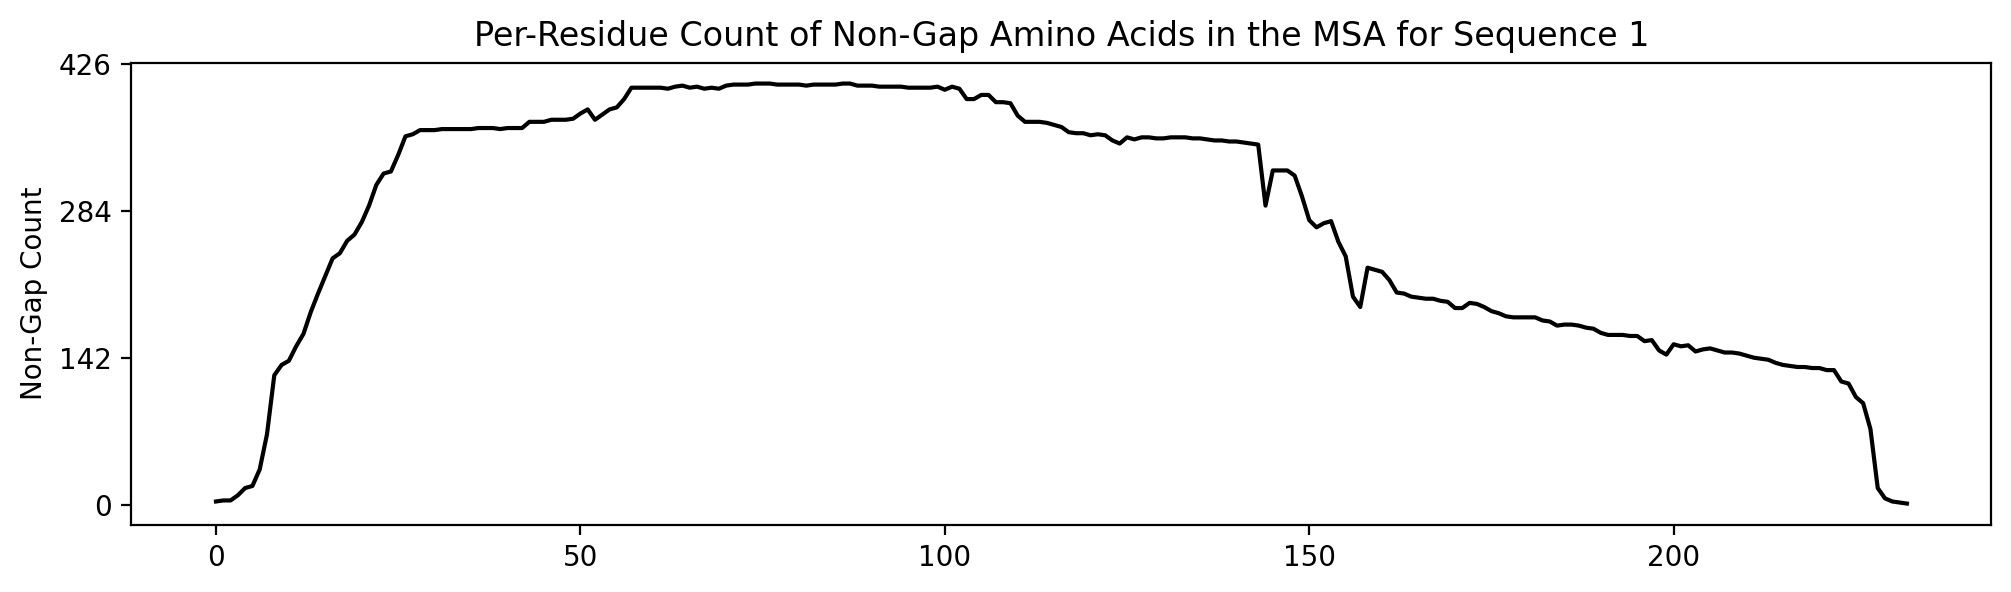

Running model_2_ptm:  86%|████████▌ | 6/7 [elapsed: 24:01 remaining: 03:57]WARNING:root:
Running model without relaxation stage. Use flag [--relax] ('relax=True') to include AMBER relaxation.
Running model_2_ptm: 100%|██████████| 7/7 [elapsed: 24:14 remaining: 00:00]


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

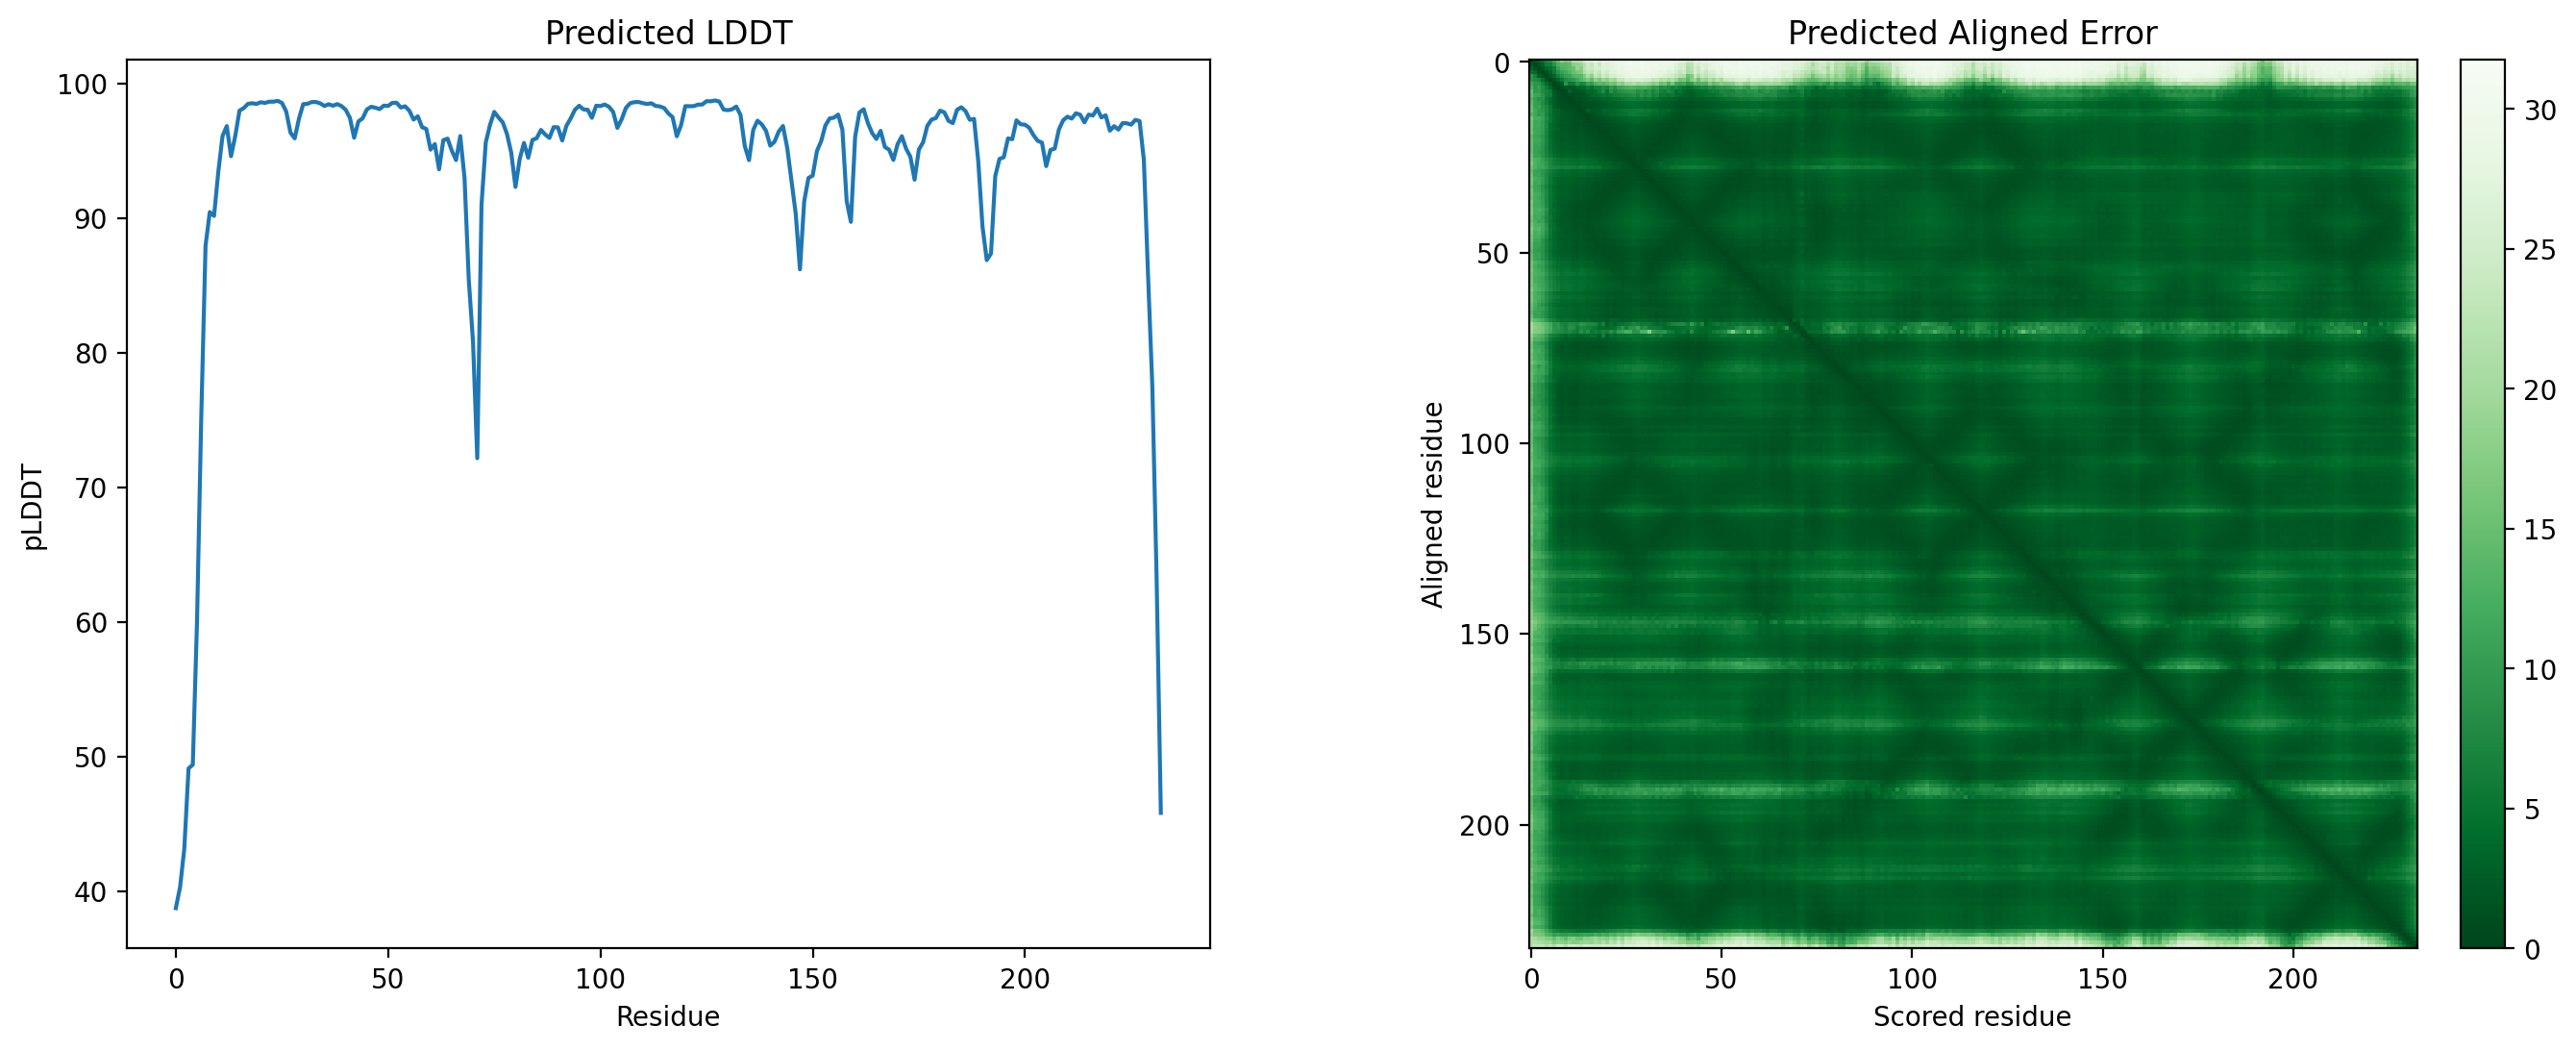

In [ ]:
gget.alphafold(seq[1])

**6. Compare predicted protein structure to the crystal structure of related proteins:**  

In [ ]:
# Download generated/fetched PDB files
import shutil
import glob
from google.colab import files

# Download gget alphafold prediction
for folder in glob.glob("*_gget_alphafold_prediction"):
  # Zip folder
  shutil.make_archive(folder, "zip", folder)
  # Download zipped folder
  files.download(f"{folder}.zip")

# Download PDB files containing crystal structures of related proteins
for pdb_file in glob.glob("*.pdb"):
  files.download(pdb_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now that we have all the PDB files of interest, we can compare them interactively in 3D here: https://www.rcsb.org/alignment. (To upload custom PDBs, select "File Upload" from the drop-down menu next to the trash can icon.)

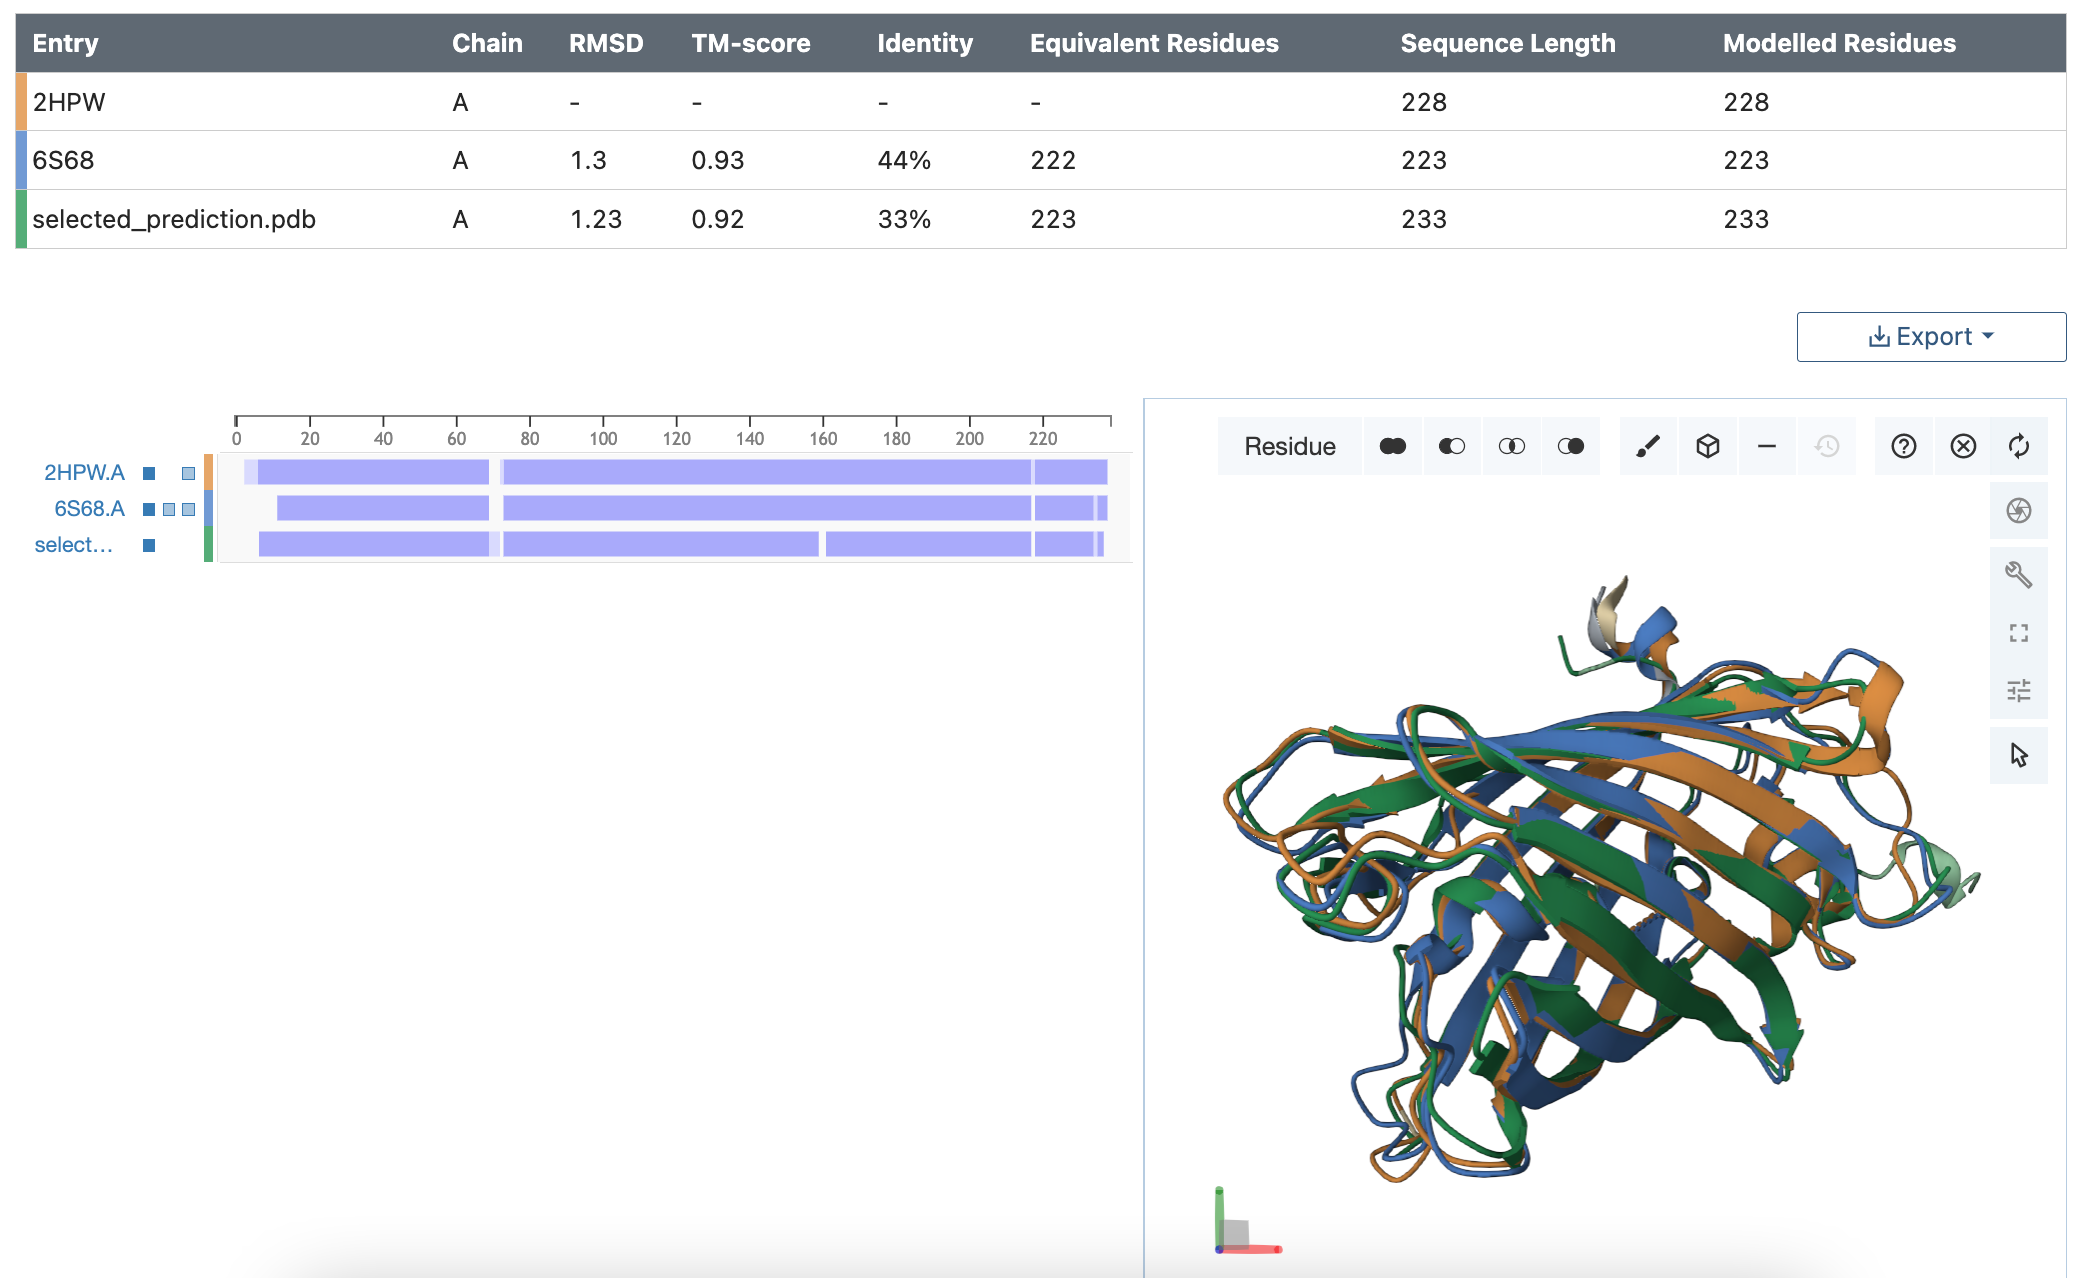